## Libraries

In [9]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as ff

In [10]:
parent_directory = os.path.join(os.environ["BLACK_BOX"])
evals_path = os.path.join(parent_directory, "experiments/results/evaluation_statistics")
sys.path.append(parent_directory)

from experiments.utils.validation_utils import load_eval_from_csv

## Experiments Paths

In [11]:
# evaluation RL model folders located in ./experiments/results/evaluation_statistics folder
n_seeds = 5

exp_folders_idm = [
    "seed_1999/evaluation_idm_2_connected_samples_05_50_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_12/evaluation_idm_2_connected_samples_05_50_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0"
    "seed_9/evaluation_idm_2_connected_samples_05_50_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0"
    "seed_2022/evaluation_idm_2_connected_samples_05_50_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0"
    "seed_42/evaluation_idm_2_connected_samples_05_50_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0"
]

exp_folders_grid = [
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-50-34oharsea7_Agent1_grid",
    "seed_9/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-50-34oharsea7_Agent1_grid",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-50-34oharsea7_Agent1_grid",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-50-34oharsea7_Agent1_grid",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-50-34oharsea7_Agent1_grid",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-32-14pw24ok8e_Agent2_grid",
    "seed_9/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-32-14pw24ok8e_Agent2_grid",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-32-14pw24ok8e_Agent2_grid",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-32-14pw24ok8e_Agent2_grid",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-32-14pw24ok8e_Agent2_grid",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-17-443f3le4ai_Agent3_grid",
    "seed_9/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-17-443f3le4ai_Agent3_grid",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-17-443f3le4ai_Agent3_grid",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-17-443f3le4ai_Agent3_grid",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-17-443f3le4ai_Agent3_grid",

]
exp_folders_mc = [
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-49-312_rhg1q1_Agent1_mc",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-39-09926gko_u_Agent1_mc",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-49-312_rhg1q1_Agent1_mc",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-39-09926gko_u_Agent1_mc",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-49-312_rhg1q1_Agent1_mc",

    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-29-35uxa2mv8v_Agent2_mc",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-50-23gc0ezwmy_Agent2_mc",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-29-35uxa2mv8v_Agent2_mc",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-50-23gc0ezwmy_Agent2_mc",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_16-29-35uxa2mv8v_Agent2_mc",

    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-15-476oxy54mv_Agent3_mc",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-35-595uvfyj_h_Agent3_mc",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-15-476oxy54mv_Agent3_mc",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-35-595uvfyj_h_Agent3_mc",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-15-476oxy54mv_Agent3_mc",
]
exp_folders_ce = [
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-18-14jgjirids_Agent1_ce",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-42-00hooez3la_Agent1_ce",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-18-14jgjirids_Agent1_ce",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-42-00hooez3la_Agent1_ce",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_12-18-14jgjirids_Agent1_ce",

    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_15-07-50zv8_eroi_Agent2_ce",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_14-59-19tn3rahh6_Agent2_ce",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_15-07-50zv8_eroi_Agent2_ce",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_14-59-19tn3rahh6_Agent2_ce",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_15-07-50zv8_eroi_Agent2_ce",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-13-38zp5ij_ha_Agent3_ce",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_16-24-30umz1icqo_Agent3_ce",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-13-38zp5ij_ha_Agent3_ce",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_16-24-30umz1icqo_Agent3_ce",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-09_20-13-38zp5ij_ha_Agent3_ce",
]
exp_folders_bo = [
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    
    "seed_12/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_23-02-417uou2508_Agent1_bo",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-40-209mcd0asb_Agent1_bo",
    "seed_42/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-40-209mcd0asb_Agent1_bo",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-40-209mcd0asb_Agent1_bo",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_23-02-417uou2508_Agent1_bo",
    
    "seed_12/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_07-04-47d194k0gb_Agent2_bo",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-02-128_acqlfm_Agent2_bo",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_07-04-47d194k0gb_Agent2_bo",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-02-128_acqlfm_Agent2_bo",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_07-04-47d194k0gb_Agent2_bo",
    
    "seed_12/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_09-55-59blagjf2f_Agent3_bo",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-38-10ucphqanq_Agent3_bo",
    "seed_42/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-38-10ucphqanq_Agent3_bo",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-38-10ucphqanq_Agent3_bo",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_09-55-59blagjf2f_Agent3_bo",
]
exp_folders_ams = [
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-08_20-38-04zwfw2_vj_Agent0",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-11_16-38-15kgcwmnhn_Agent0",
    
    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_10-36-06liopkmhd_Agent1_ams",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-45-31rxfv9zzx_Agent1_ams",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_11-56-460y0strry_Agent1_ams",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_13-45-31rxfv9zzx_Agent1_ams",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_10-36-06liopkmhd_Agent1_ams",

    "seed_12/evaluation_container_uniform_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_11-56-460y0strry_Agent2_ams",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-31-05n41q5t0s_Agent2_ams",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_11-56-460y0strry_Agent2_ams",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_15-31-05n41q5t0s_Agent2_ams",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_11-56-460y0strry_Agent2_ams",
    
    "seed_12/evaluation_Random_ContainerPPOTrainer_highway_environment:highway-environment-v0_2022-09-10_13-37-05o9_fwqcp_Agent3_ams",
    "seed_9/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-46-58mel5v_pn_Agent3_ams",
    "seed_42/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_13-37-05o9_fwqcp_Agent3_ams",
    "seed_2022/evaluation_ams_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-12_17-46-58mel5v_pn_Agent3_ams",
    "seed_6/evaluation_Random_Container_PPOTrainer_highway_environment:highway-environment-v0_2022-09-10_13-37-05o9_fwqcp_Agent3_ams",
]

save_name = "collision_number_bar"
method_paths = [exp_folders_idm, exp_folders_grid, exp_folders_mc, exp_folders_ce, exp_folders_bo, exp_folders_ams]
algo_names = ["IDM     \nRule-Based", "GS Sampled\nRL Agent  ", "MC Sampled\nRL Agent  ", "CE Sampled\nRL Agent  ", "BO Sampled\nRL Agent  ", "AMS Sampled\nRL Agent  "]
algo_colors = ["rgb(64, 13, 81)", "rgb(0, 92, 171)", "rgb(227, 27, 35)", "rgb(255, 195, 37)", "rgb(108, 172, 154)", "rgb(172, 108, 108)"]
colors = ['#400D51', '#393E46', '#2BCDC1', '#F66095', '#B8F7D4']

gen_number = 0

In [12]:
# get all evaluations
eval_paths = []

for exp_folders in method_paths:
    
    exp_folder = exp_folders[gen_number]
    
    eval_directory = os.path.join(evals_path, exp_folder)
    eval_paths.append([eval_directory + "/" + f for f in os.listdir(eval_directory) if os.path.isfile(os.path.join(eval_directory, f))])

## Data Preprocess

In [13]:
def get_stats(eval_files):
    full_eps_results = []
    eps_rewards = []
    n_collisions = []
    n_impossibles = []

    for eps_stat in eval_files:
        stat_df = load_eval_from_csv(file_name=eps_stat)

        eps_avg_reward = stat_df["ego_rewards"].mean(skipna = True)
        eps_sum_reward = stat_df["ego_rewards"].sum(skipna = True)
        eps_rewards.append(eps_sum_reward)

        is_collision = stat_df["is_collision"].iloc[0]
        n_collisions.append(is_collision)

        is_impossible = stat_df["is_impossible"].iloc[0]
        n_impossibles.append(is_impossible)
        
        # if not is_impossible and stat_df["episode_min_ttc"].iloc[0] < 2:
        # if not is_impossible and is_collision:
        if not is_impossible:
            full_eps_results.append(stat_df)
    
    return full_eps_results, eps_rewards, sum(n_collisions), sum(n_impossibles)

## Get Features

In [ ]:
all_results = []

for idx, eval_path in enumerate(eval_paths):
    eps_results, eps_rewards, n_collisions, n_impossibles = get_stats(eval_files=eval_path)
    all_results.append(pd.concat(eps_results))

In [15]:
ttc_features = []
tgap_features = []

for results in all_results:
    ttc_features.append(results.ttc[results.ttc.between(0.0, 5)])
    
    tgap_features.append(results.tgap[results.tgap.between(0.0, 5)])

## Plot Figures

In [16]:
# group data together
ttc_hist_data = []
for ttc_feature in ttc_features:
    ttc_hist_data.append(ttc_feature.to_list())
    
tgap_hist_data = []
for tgap_feature in tgap_features:
    tgap_hist_data.append(tgap_feature.to_list())

In [ ]:
# create distplot with custom bin_size
fig = ff.create_distplot(tgap_hist_data, algo_names, bin_size=2, show_hist=False, colors=algo_colors, show_rug=False)

fig.update_layout(title_text="Time Gap")

pio.write_image(fig, "hist_plot_tgap_gen" + str(gen_number) + ".svg", width=1011, height=625)

fig.show()

In [ ]:
# create distplot with custom bin_size
fig = ff.create_distplot(ttc_hist_data, algo_names, bin_size=2, show_hist=False, colors=algo_colors, show_rug=False)

fig.update_layout(title_text="TTC")

pio.write_image(fig, "hist_plot_ttc_gen" + str(gen_number) + ".svg", width=1011, height=625)

fig.show()

In [ ]:
# create distplot with custom bin_size
fig = ff.create_distplot(
    ttc_hist_data, algo_names,
    bin_size=2,
    show_hist=False,
    colors=algo_colors,
    show_rug=False
)

fig.update_layout(
    # title="Number of Collisions in Evaluation of Each Model",
    xaxis_tickfont_size=24,
    yaxis=dict(
        title="Time Gap (s)",
        titlefont_size=20,
        tickfont_size=20,
    ),
    legend=dict(
        x=0.74,
        y=1.00,
        bgcolor="rgba(255, 255, 255, 0)",
        bordercolor="rgba(255, 255, 255, 0)"
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.update_layout(showlegend=True)
fig.update_layout(
    xaxis_title="Time Gap (s)",
    yaxis_title="Density",
    font=dict(
        family="Times New Roman",
        size=20,
        color="black"
    )
)

pio.write_image(fig, "hist_plot_ttc_gen" + str(gen_number) + ".svg", width=1011, height=625)

fig.show()

In [ ]:
fig = px.histogram(
    pd.DataFrame(tgap_features[0]),
    x=tgap_features[0].index, y=tgap_features[0].values, marginal="box")
fig.show()

In [ ]:
fig = px.box(tgap_features[0], x=tgap_features[0].index, y=tgap_features[0].values, 
             title="Course Enrollment Numbers")
fig.show()

In [ ]:
GS_df = pd.DataFrame({"tgap": tgap_hist_data[0], "method": ["GS"]*len(tgap_hist_data[0]), "color": [algo_colors[0]]*len(tgap_hist_data[0])})
MC_df = pd.DataFrame({"tgap": tgap_hist_data[1], "method": ["MC"]*len(tgap_hist_data[1]), "color": [algo_colors[1]]*len(tgap_hist_data[1])})
CE_df = pd.DataFrame({"tgap": tgap_hist_data[2], "method": ["CE"]*len(tgap_hist_data[2]), "color": [algo_colors[2]]*len(tgap_hist_data[2])})
BO_df = pd.DataFrame({"tgap": tgap_hist_data[3], "method": ["BO"]*len(tgap_hist_data[3]), "color": [algo_colors[3]]*len(tgap_hist_data[3])})
AMS_df = pd.DataFrame({"tgap": tgap_hist_data[4], "method": ["AMS"]*len(tgap_hist_data[4]), "color": [algo_colors[4]]*len(tgap_hist_data[4])})
algo_df = pd.concat([GS_df, MC_df, CE_df, BO_df, AMS_df])
algo_df

In [ ]:
fig = px.box(algo_df, x="method", y="tgap", color="color", notched=True)

fig.update_layout(
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
#     margin=dict(
#         l=40,
#         r=30,
#         b=80,
#         t=100,
#     ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

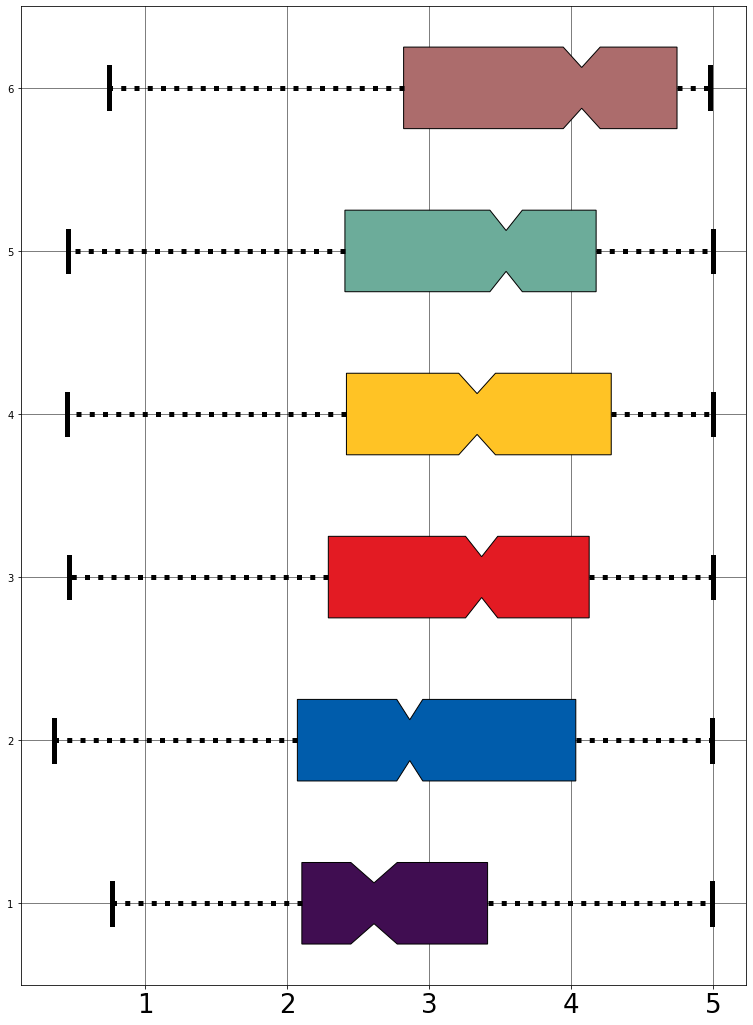

In [58]:
data = ttc_hist_data
csfont = {'fontname':'Times New Roman', 'size'   : 26}
csfont_small = {'fontname':'Times New Roman', 'size'   : 16}
 
fig = plt.figure(figsize =(13, 18))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 0)
colors = ["#400D51", "#005cab", "#e31b23", "#ffc325", "#6cac9a", "#ac6c6c"]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
# changing color and linewidth of
for whisker in bp['whiskers']:
    whisker.set(color = 'black', linewidth = 5, linestyle =":")
# changing color and linewidth of
for cap in bp['caps']:
    cap.set(color = 'black', linewidth = 5)
# changing color and linewidth of
for median in bp['medians']:
    median.set(color = 'yellow', linewidth = 0)
    
#ax.set_yticklabels(algo_names, **csfont_small)
#plt.title("Generation - 3", **csfont)

#plt.xlabel("Time-to-Collision (s)", **csfont)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.tick_params(axis='x', which='major', labelsize=26)

ax.grid(color='black', linestyle='-', linewidth=0.5)

plt.savefig("test_ttc.svg")

plt.show()

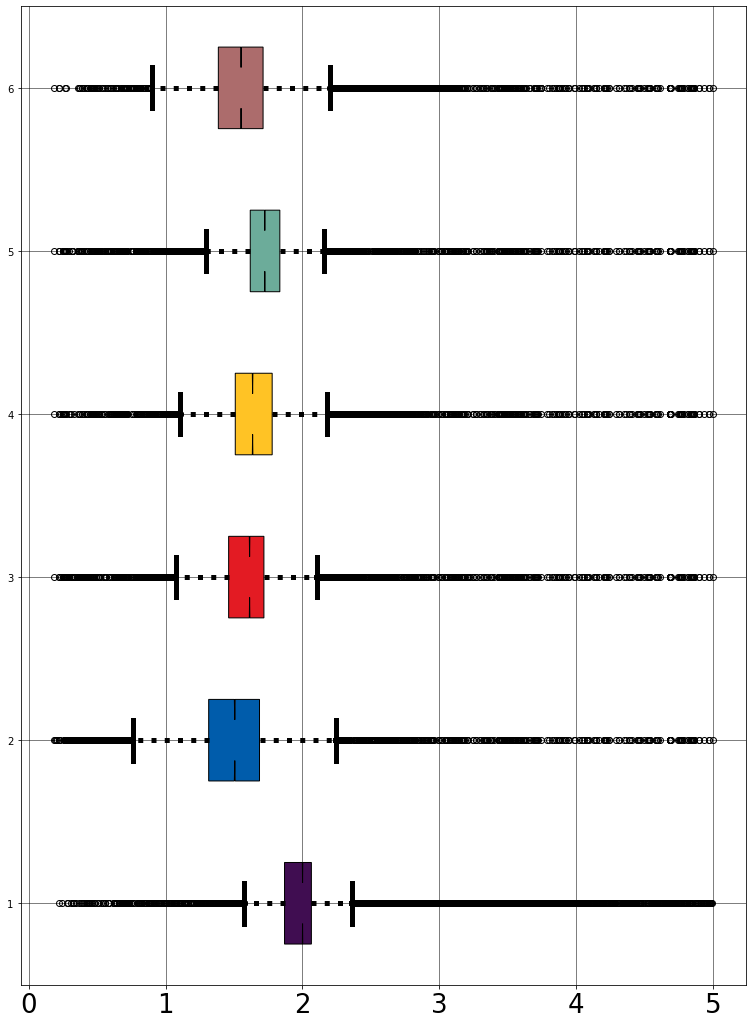

In [59]:
data = tgap_hist_data
csfont = {'fontname':'Times New Roman', 'size'   : 26}
csfont_small = {'fontname':'Times New Roman', 'size'   : 16}
 
fig = plt.figure(figsize =(13, 18))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, notch ='True', vert = 0)
colors = ["#400D51", "#005cab", "#e31b23", "#ffc325", "#6cac9a", "#ac6c6c"]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
# changing color and linewidth of
for whisker in bp['whiskers']:
    whisker.set(color = 'black', linewidth = 5, linestyle =":")
# changing color and linewidth of
for cap in bp['caps']:
    cap.set(color = 'black', linewidth = 5)
# changing color and linewidth of
for median in bp['medians']:
    median.set(color = 'black', linewidth = 0)
    
#ax.set_yticklabels(algo_names, **csfont_small)
#plt.title("Generation - 3", **csfont)

#plt.xlabel("Time-Gap (s)", **csfont)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

ax.tick_params(axis='x', which='major', labelsize=26)

ax.grid(color='black', linestyle='-', linewidth=0.5)

plt.savefig("test_tgap.svg")

plt.show()